# Syllabus
- Apply K-means
- Apply Spectral Clustering
- Apply Spectral Clustering using Andrew Ng's Alorithm

In [1]:
import numpy as np
import scipy as sp
from numpy import genfromtxt
# from numpy import linalg as LA
import scipy.linalg as la
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
%matplotlib inline

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex
import pattrex.kdTreeCK as kd_rex
import pattrex.KNearestNeighbor as knn_rex
import pattrex.SpectralClustering as sc_rex
import pattrex.SpectralClustering_AndrewNg as scan_rex
import pattrex.fun_with_k_means as km_rex


from pattrex.demo_helper import read_whdata

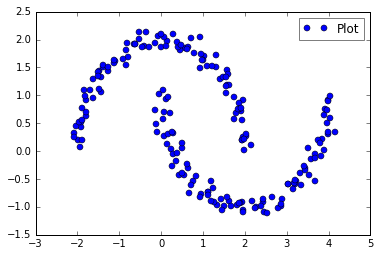

In [2]:
# dt = np.dtype([('w', np.float), ('h', np.float), ('g', 'S1')])  # g is byte-string

my_data = genfromtxt('data/data-clustering-2.csv', delimiter=',')
# print(my_data)
x = my_data[0,:]
y = my_data[1,:]

# a=np.where(my_data[0,:]>1.9)
# a2=np.where(my_data[0,:]<2.1)
# ai = np.intersect1d(a,a2)
# print(ai)
# b =np.where(my_data[1,:]>-0.1)
# b2 =np.where(my_data[1,:]<0.1)
# bi = np.intersect1d(b,b2)
# print(bi)
# # (1.97295076156269,0.0158050839669905)
# c = np.intersect1d(ai,bi)
# print(c)
# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

plt_rex.plot2d(my_data, colwise_data=True, hatch='bo', 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="Plot")

## Apply K-means on Data

In [ ]:
k = 2
data = my_data.T
centroidsInit = np.array([[1, 2], [3, 4]])
centroids, idx, cond = km_rex.kmeans_Lloyd(data, k, centroidsInit)
# idx, _ = km_rex.vq(data, centroids)
km_rex.show_plotted_cluster(data, idx, centroids, "Lloyd's algorithm",k)

# Hartigan's algorithm
centroids, idx = km_rex.kmeans_hartigans(data, k)
km_rex.show_plotted_cluster(data, idx, centroids, "Hartigan's algorithm",k)

# MacQueen's algorithm
centroids, idx = km_rex.kmeans_macqueen(data, k)
km_rex.show_plotted_cluster(data, idx, centroids, "MacQueen's algorithm",k)

## Apply Spectral Clustering on Data
- Get a good result at beta = 11
- By observation, we see that some edges points would be mis-judged as beta grows from 1 to 15
- The Upper half contains 100 points, and so is the lower half.

In [ ]:
for i in np.arange(11,12,1):
    ur,index,u_idx_pos,u_idx_neg = sc_rex.SpectralClustering(my_data, i)
#     if(len(u_idx_pos[0])>=(len(u_idx_neg[0]))):
#         print(len(u_idx_pos[0]))
#     if(len(u_idx_pos[0])==(len(u_idx_neg[0]))):
#         print("Got",i)
    sc_rex.plot(my_data,ur,index,u_idx_pos,u_idx_neg)

### Play around the number of halfs
- See how the number of halfs changes

In [ ]:
for i in np.arange(1,20,1):
    ur,index,u_idx_pos,u_idx_neg = sc_rex.SpectralClustering(my_data, i)
    if(len(u_idx_pos[0])>=(len(u_idx_neg[0]))):
        print(i,len(u_idx_pos[0]))
    else:
        print(i,len(u_idx_neg[0]))
    if(len(u_idx_pos[0])==(len(u_idx_neg[0]))):
        print("Got",i," with 100 each")
        sc_rex.plot(my_data,ur,index,u_idx_pos,u_idx_neg)

## Exam the Laplacian Matrix
- S = exp(-beta* |x_i-x_j|^2) which is indepandent on the data order
- D = Sum(j to n)(Sij) if i=j which is depandent on the data order
- L = D - S 

### Shuffle the data order to see the result
- we would have a differnet beta or even unable to get one sometime. Sometimes we got a lot
- But we see that the upper half gathered close to y=0 line, while the lower half spread around.

In [ ]:
idx = np.arange(0,200,1)
np.random.shuffle(idx)

In [ ]:
for i in np.arange(1,20,1):
    ur,index,u_idx_pos,u_idx_neg = sc_rex.SpectralClustering(my_data[:,idx], i)
    if(len(u_idx_pos[0])==(len(u_idx_neg[0]))):
        print("Got",i)
    sc_rex.plot(my_data[:,idx],ur,index,u_idx_pos,u_idx_neg)

## Spectral Clustering using Andrew Ng's Alorithm
- On Spectral Clustering: Analysis and an algorithm by Andre Ng, etc.
- S = exp(-|x_i-x_j|^2 / 2*(sigma^2))
- D = diagonal matrix whose (i, i)-element is the sum of A's i-th row
- L = D^(-1/2)AD^(-1/2)
- FInd the k largest eigenvectors of L and normalized them into matrix X
- Treating X as new set of data, apply k-means clustering
- Based on the clustering result to cluster the original data

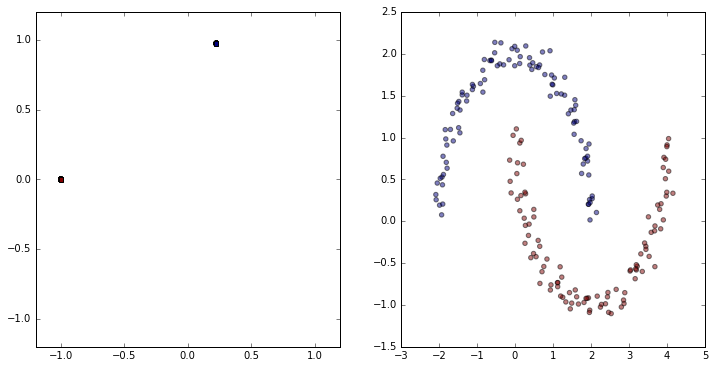

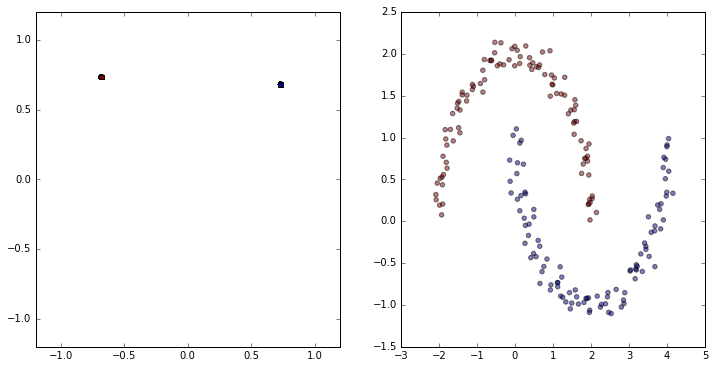

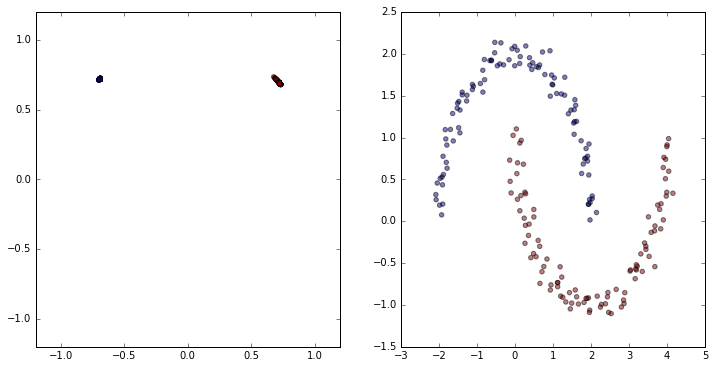

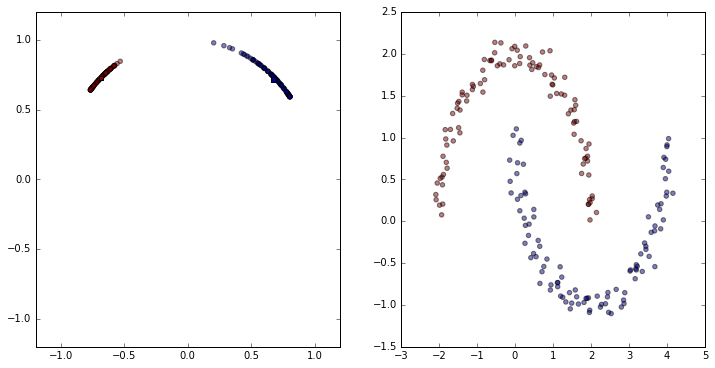

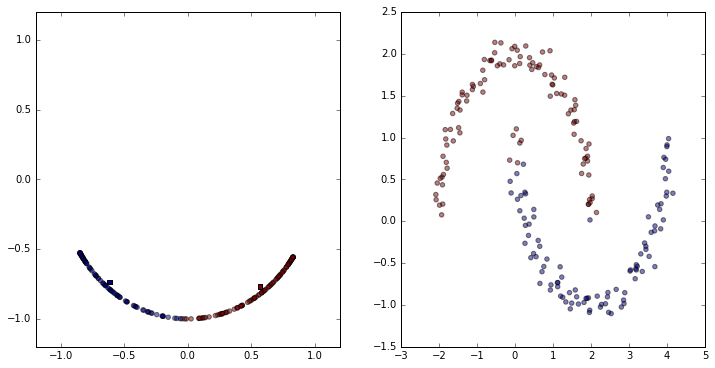

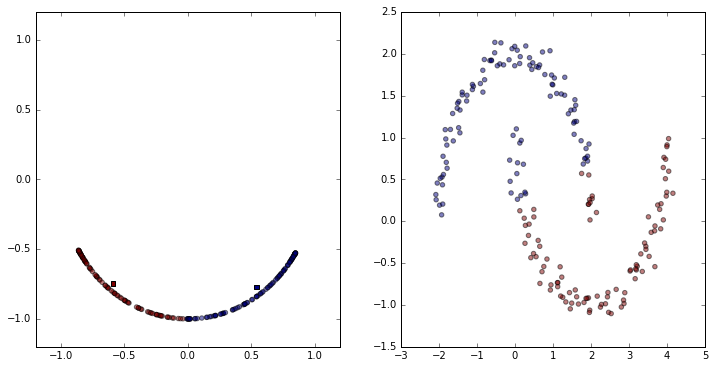

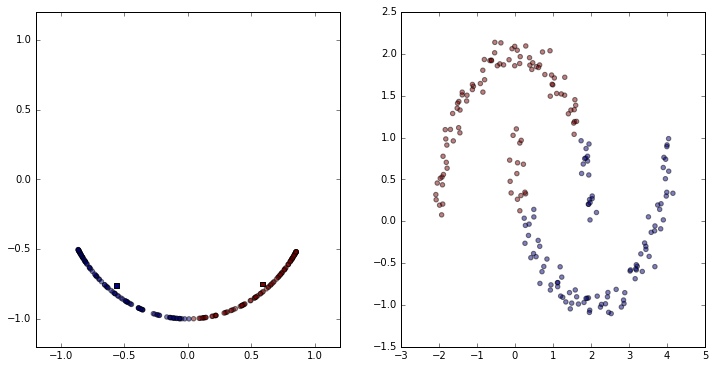

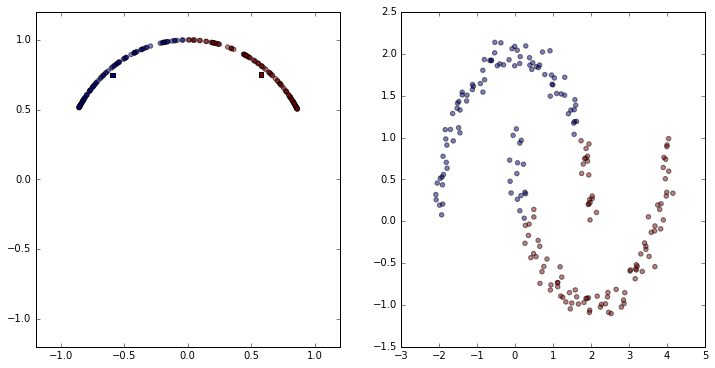

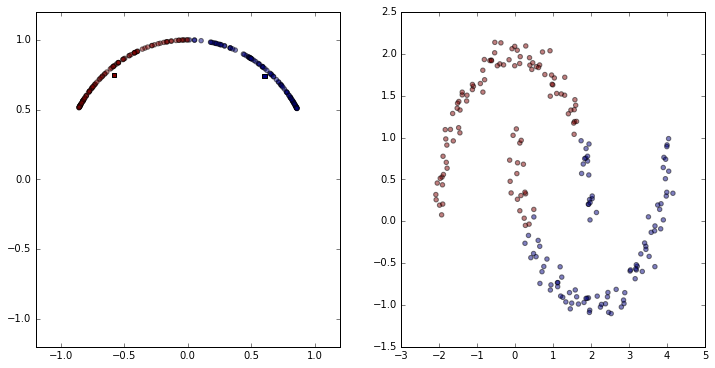

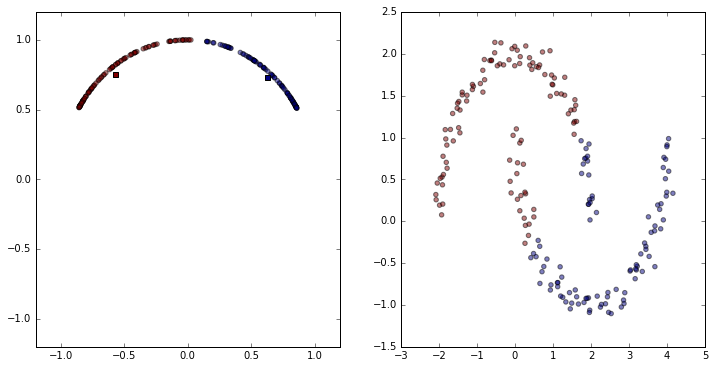

In [3]:
scan_rex.demo1(my_data,2, 0.05, 1, 0.1)#(my_data,k, sigma, start, end, step):

### Shuffle the data### Shuffle the data order to see the result
- We would have same L on differnet odering of data
- As prediction, the resulting sigma would not change

In [ ]:
idx = np.arange(0,200,1)
np.random.shuffle(idx)
scan_rex.demo1(my_data[:,idx],2, 0.05, 1, 0.1)#(my_data,k, sigma, start, end, step):

## Discussion
- Even if the data is shuffled, the sigma to generate good clustering is stable.
- We could evaluate the result based on how tight the processed group is.
- It is easier to determine wheter this Y is valid or not.

## Evaluate the tightness of Data
- Variance
- Support Vector Machine